<h1>The Next Dimension</h1>
<p>R. Treharne</p>

In [11]:
%pylab inline
import getdata as gd

Populating the interactive namespace from numpy and matplotlib


<h3>Objective 1:</h3>
<p>Read the data from 'data.csv' below</p>

In [8]:
#I've cheated here and imported the script used in the previous missio
d = gd.data_dict('data.csv') #d is a dictionary

In [9]:
#create x,y and z lists for data
x = d.get('data')[0]
y = d.get('data')[1]
z = d.get('data')[2]

<h3>Objective 2:</h3>
<p>Generate a simple black and white contour plot</p>

In [4]:
#create new 1D xi and yi arrays of 100 data points scaled to your x and y data
xi = linspace(min(x), max(x), 100)
yi = linspace(min(y), max(y), 100)

#griddata function interplates your data and creates a mega array ...
#... of 100 x 100 data points.
zi = griddata(x, y, z, xi, yi, interp='linear')

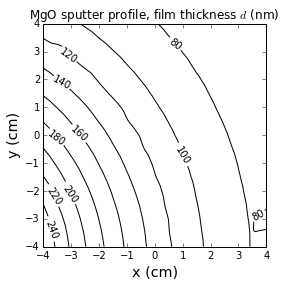

In [5]:
#create a new figure object
fig = figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal') #this is important otherwise your plot will look skewed

#make a contour plot! 10 --> number of contours
#colors='k' simply specifies that it's for a black and white image
CS = ax.contour(xi, yi, zi, 10, colors='k')

#don't forget to label your contours
ax.clabel(CS, fontsize=10, fmt='%1.0f')

ax.set_title('MgO sputter profile, film thickness $d$ (nm)')

if d.get('headers'):
    ax.set_xlabel(d.get('headers')[0])
    ax.set_ylabel(d.get('headers')[1])

<h3>Objective 3:</h3>
<p>Jazz up your contour plot with a bit of colour</p>

<a list of 10 text.Text objects>

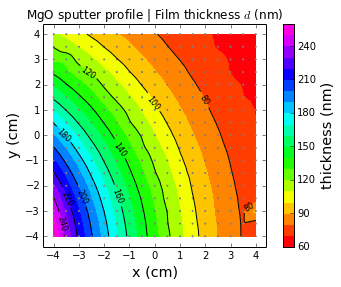

In [7]:
#But why would you stick to black and white?
#Most papers are happy to accept color figures these days

fig2 = figure()
ax = fig2.add_subplot(111)
ax.set_aspect('equal')


CF = ax.contourf(xi, yi, zi, 20, cmap='gist_rainbow')
#for a range of cmap colours checkout ...
#...http://matplotlib.org/users/colormaps.html

#It would be a sin not to use a colour bar
CB = colorbar(CF)

#you could overlay your raw datapoints
GD = ax.scatter(x, y, c=z, s=1, color = 'grey')

ax.set_title('MgO sputter profile | Film thickness $d$ (nm)')

if d.get('headers'):
    ax.set_xlabel(d.get('headers')[0])
    ax.set_ylabel(d.get('headers')[1])
    CB.set_label(d.get('headers')[2])
    
    
#You can still overlay your contour lines if you like    
CL = ax.contour(xi, yi, zi, 10, colors='k')
ax.clabel(CL, fontsize=8, fmt='%1.0f')

